In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



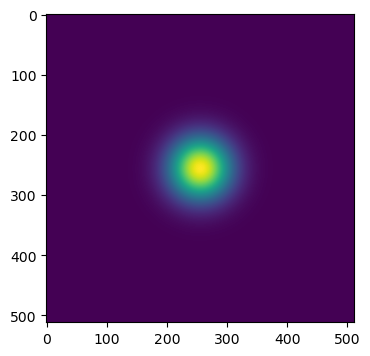

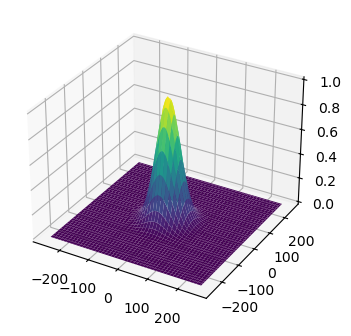

In [11]:
beta_Filt_PBGauss = 255
# Creamos un filtro pasa bajas gaussiano de dimensiones 512x512
F1=np.arange(-256,256,1)
F2=np.arange(-256,256,1)
[X,Y]=np.meshgrid(F1,F2)
R=np.sqrt(X**2+Y**2)
R=R/np.max(R)
sigma = 0.1

# Filtro pasa bajas con función gaussiana
Filt_PBGauss = np.exp(-(R**2)/(2*sigma**2))

# Graficamos el filtro en 2D
fig = plt.figure(figsize=(4, 4))
plt.imshow(Filt_PBGauss)
plt.show()

# Graficamos el filtro en 3D
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Filt_PBGauss,cmap=plt.cm.viridis)
plt.show()



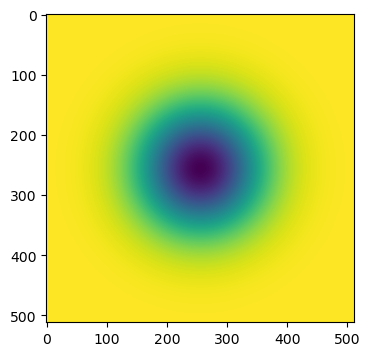

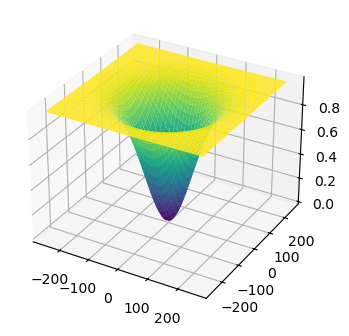

In [12]:
beta_Filt_PAGauss = 1

# Creamos un filtro pasa altas gaussiano de dimensiones 512x512
F1=np.arange(-256,256,1)
F2=np.arange(-256,256,1)
[X,Y]=np.meshgrid(F1,F2)
R=np.sqrt(X**2+Y**2)
R=R/np.max(R)
sigma = 0.2

# Filtro pasa altas con función gaussiana
Filt_PAGauss = 1-np.exp(-(R**2)/(2*sigma**2))

# Graficamos el filtro en 2D

plt.figure(figsize = (4,4))
plt.imshow(Filt_PAGauss)
plt.show()

# Graficamos el filtro en 3D
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Filt_PAGauss,cmap=plt.cm.viridis)
plt.show()


C:\Users\karim\AppData\Local\Temp\ipykernel_29444\5403439.py:11: RuntimeWarning: divide by zero encountered in divide
  Filt_PBandaGauss = np.exp(-(((R**2) - (sigma**2))/(0.75*R))**2)


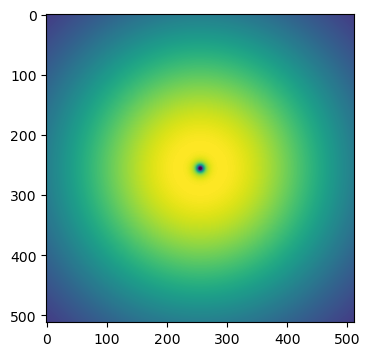

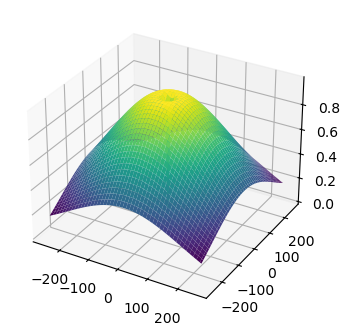

In [13]:
beta_Filt_PBandaGauss = 1

F1=np.arange(-256,256,1)
F2=np.arange(-256,256,1)
[X,Y]=np.meshgrid(F1,F2)
R=np.sqrt(X**2+Y**2)
R=R/np.max(R)
sigma = 0.1

# Filtro pasa banda
Filt_PBandaGauss = np.exp(-(((R**2) - (sigma**2))/(0.75*R))**2)

# Graficamos el filtro en 2D

plt.figure(figsize = (4,4))
plt.imshow(Filt_PBandaGauss)
plt.show()

# Graficamos el filtro en 3D
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Filt_PBandaGauss,cmap=plt.cm.viridis)
plt.show()

C:\Users\karim\AppData\Local\Temp\ipykernel_29444\2589902098.py:11: RuntimeWarning: divide by zero encountered in divide
  Filt_ReBandaGauss = 1 -np.exp(-(((R**2) - (sigma**2))/(0.25*R))**2)


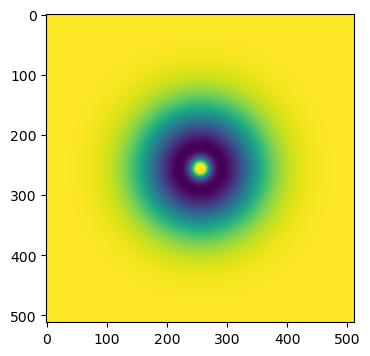

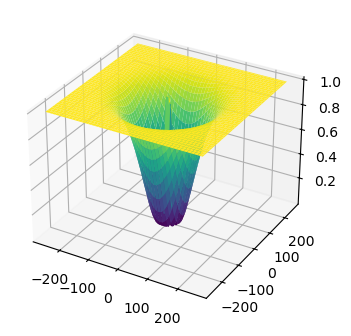

In [14]:
beta_Filt_ReBandaGauss = 255

F1=np.arange(-256,256,1)
F2=np.arange(-256,256,1)
[X,Y]=np.meshgrid(F1,F2)
R=np.sqrt(X**2+Y**2)
R=R/np.max(R)
sigma = 0.1

# Filtro rechaza banda
Filt_ReBandaGauss = 1 -np.exp(-(((R**2) - (sigma**2))/(0.25*R))**2)

# Graficamos el filtro en 2D

plt.figure(figsize = (4,4))
plt.imshow(Filt_ReBandaGauss)
plt.show()

# Graficamos el filtro en 3D
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Filt_ReBandaGauss,cmap=plt.cm.viridis)
plt.show()

In [15]:
#filtros         ,      beta   

#Pasa Baja
Filt_PBGauss     , beta_Filt_PBGauss

#Pasa Alta
Filt_PAGauss     , beta_Filt_PAGauss

#Pasa banda
Filt_PBandaGauss , beta_Filt_PBandaGauss

#Rechaza banda
Filt_ReBandaGauss, beta_Filt_ReBandaGauss



camera = cv2.VideoCapture(0)
while(True):
    _, frame = camera.read()

    def AplicadorFiltroGaussColor(image,filtroE,B=255):
        image =cv2.resize(image,(512,512))

        # Aplicar el filtro a cada canal de color
        channels = cv2.split(image)
        filtered_channels = []
        l_IMG_EspectroF=[]
        L_IMG_EspectroF_Filtrada=[]
        for channel in channels:
            IMG_EspectroF = np.fft.fftshift(np.fft.fft2(channel))
            IMG_EspectroF_Filtrada = np.multiply(IMG_EspectroF,filtroE)
            IMG_Filtrada = np.fft.ifft2(np.fft.ifftshift(IMG_EspectroF_Filtrada))
            IMG_FiltradaFinal = cv2.normalize(abs(IMG_Filtrada),None,alpha=0,beta=255, norm_type= cv2.NORM_MINMAX, dtype = cv2.CV_8U)
            filtered_channels.append(IMG_FiltradaFinal)

            l_IMG_EspectroF.append(cv2.normalize(abs(IMG_EspectroF),None,alpha=0,beta=255, norm_type= cv2.NORM_MINMAX, dtype = cv2.CV_32F))
            L_IMG_EspectroF_Filtrada.append(cv2.normalize(abs(IMG_EspectroF_Filtrada),None,alpha=0,beta=B, norm_type= cv2.NORM_MINMAX, dtype = cv2.CV_32F))

        # Combinar los canales de color de nuevo
        image_filtered = cv2.merge(filtered_channels)
        IMG_EspectroFFinal = cv2.merge(l_IMG_EspectroF)
        IMG_EspectroF_FiltradoFinal = cv2.merge(L_IMG_EspectroF_Filtrada)
        cv2.imshow("Imagen Original",image)
        cv2.imshow("Imagen Filtrada", image_filtered)

        cv2.imshow("Espectro Original",  IMG_EspectroFFinal)  
        cv2.imshow("Espectro Filtrado", IMG_EspectroF_FiltradoFinal)   
        
    AplicadorFiltroGaussColor(frame,Filt_PAGauss,beta_Filt_PAGauss)
    key =cv2.waitKey(1)
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()        